
# Exploratory Data Analysis (EDA) on Singapore Rental Data

This notebook provides a comprehensive analysis of rental accommodation data in Singapore. The goal is to understand the distribution of rental prices, the factors affecting them, and to provide insights that would be beneficial for newcomers and anyone seeking to rent in Singapore.

## Table of Contents
1. Data Overview
2. Descriptive Statistics
3. Visualizations



## 1. Data Overview

The dataset contains information on rental properties in Singapore, including details such as price, room size, unit type, room type, region, distance to the nearest MRT station, and furnishing status.

Let's start by importing the necessary libraries and loading the dataset.


In [2]:
import pandas as pd
import warnings

# Ignore all warnings
warnings.filterwarnings("ignore")

# Load the dataset
file_path = "Rental_data_final.csv"
rental_data = pd.read_csv(file_path)
rental_data.head()

,address,full_address,latitude,longitude,planning_area,region,Nearest_MRT_Station,latitude_mrt,longitude_mrt,Distance_to_Nearest_MRT_km,Walking_Time_to_Nearest_MRT_min,price,unit_type,room_type,room_size_sqft,status,updated_date,link
0,356C Ubi Road 3,"356C, Ubi Road 3, Geylang, Southeast, 403356, ...",1.327516,103.899934,Geylang,Central,UBI MRT STATION,1.329957,103.899253,0.281770,3.381235,1280,HDB,Common room,120,FULLY FURNISHED,07/09/2023,https://99.co/singapore/rooms/property/356c-ub...
1,356D Ubi Road 3,"356D, Ubi Road 3, Geylang, Southeast, 404356, ...",1.327023,103.899984,Geylang,Central,UBI MRT STATION,1.329957,103.899253,0.336218,4.034620,1700,HDB,Master room,269,PARTIALLY FURNISHED,16/09/2023,https://99.co/singapore/rooms/property/356d-ub...
2,356D Ubi Road 3,"356D, Ubi Road 3, Geylang, Southeast, 404356, ...",1.327023,103.899984,Geylang,Central,UBI MRT STATION,1.329957,103.899253,0.336218,4.034620,1700,HDB,Master room,269,PARTIALLY FURNISHED,28/08/2023,https://99.co/singapore/rooms/property/356d-ub...
3,357B Ubi Road 3,"357B, Ubi Road 3, Geylang, Southeast, 402357, ...",1.328372,103.899711,Geylang,Central,UBI MRT STATION,1.329957,103.899253,0.183396,2.200750,1100,HDB,Common room,130,FULLY FURNISHED,18/09/2023,https://99.co/singapore/rooms/property/357b-ub...
4,357B Ubi Road 3,"357B, Ubi Road 3, Geylang, Southeast, 402357, ...",1.328372,103.899711,Geylang,Central,UBI MRT STATION,1.329957,103.899253,0.183396,2.200750,1300,HDB,Master room,200,FULLY FURNISHED,05/09/2023,https://99.co/singapore/rooms/property/357b-ub...



## 2. Descriptive Statistics

Before diving into visualizations, it's essential to understand the basic statistics of the dataset. This section provides a summary of the central tendency, dispersion, and shape of the distribution of the dataset.


In [2]:
# Descriptive statistics for the entire dataset
rental_data.describe(include='all').style.set_sticky(axis="index") 

,address,full_address,latitude,longitude,planning_area,region,Nearest_MRT_Station,latitude_mrt,longitude_mrt,Distance_to_Nearest_MRT_km,Walking_Time_to_Nearest_MRT_min,price,unit_type,room_type,room_size_sqft,status,updated_date,link
count,7002,7002,7002.000000,7002.000000,7002,7002,7002,7002.000000,7002.000000,7002.000000,7002.000000,7002.000000,7002,7002,7002.000000,7002,7002,7002
unique,4043,3314,nan,nan,42,5,158,nan,nan,nan,nan,nan,12,4,nan,3,25,6922
top,1 Simei St 3,"Simei Street 3, Simei, Southeast, 520146, Singapore",nan,nan,Tampines,Central,YISHUN MRT STATION,nan,nan,nan,nan,nan,HDB,Common room,nan,FULLY FURNISHED,16/09/2023,https://99.co/singapore/rooms/property/versilia-on-haig-condo-eK57wKMVzpiKcFfvU7nbJ3
freq,25,65,nan,nan,489,2029,217,nan,nan,nan,nan,nan,3984,4526,nan,6334,1424,2
mean,nan,nan,1.358178,103.845632,nan,nan,nan,1.358213,103.845230,0.633098,7.597181,1457.137104,nan,nan,222.866895,nan,nan,nan
std,nan,nan,0.044474,0.069037,nan,nan,nan,0.044092,0.068724,0.413265,4.959180,1152.153151,nan,nan,285.988952,nan,nan,nan
min,nan,nan,1.263650,103.687213,nan,nan,nan,1.265473,103.697322,0.026544,0.318529,250.000000,nan,nan,50.000000,nan,nan,nan
25%,nan,nan,1.323410,103.793720,nan,nan,nan,1.323980,103.793851,0.319246,3.830953,999.000000,nan,nan,120.000000,nan,nan,nan
50%,nan,nan,1.352848,103.848536,nan,nan,nan,1.351612,103.846798,0.537917,6.455000,1250.000000,nan,nan,150.000000,nan,nan,nan
75%,nan,nan,1.386674,103.896382,nan,nan,nan,1.386724,103.893122,0.837008,10.044098,1600.000000,nan,nan,200.000000,nan,nan,nan


In [3]:
rental_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7002 entries, 0 to 7001
Data columns (total 18 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   address                          7002 non-null   object 
 1   full_address                     7002 non-null   object 
 2   latitude                         7002 non-null   float64
 3   longitude                        7002 non-null   float64
 4   planning_area                    7002 non-null   object 
 5   region                           7002 non-null   object 
 6   Nearest_MRT_Station              7002 non-null   object 
 7   latitude_mrt                     7002 non-null   float64
 8   longitude_mrt                    7002 non-null   float64
 9   Distance_to_Nearest_MRT_km       7002 non-null   float64
 10  Walking_Time_to_Nearest_MRT_min  7002 non-null   float64
 11  price                            7002 non-null   int64  
 12  unit_type           

### Here's a summary of the numerical columns:

**Price:**

- The average rental price is approximately SGD 1,457.
- Prices range from SGD 250 to a maximum of SGD 48,000.
- The median price is SGD 1,250, which indicates that most rentals are priced around this value, while the high maximum value  suggests there are some luxury or highly-priced listings in the dataset.

**Distance to Nearest MRT (in km):**

- On average, properties are about 0.63 km away from the nearest MRT station.
- The closest property to an MRT station is only about 0.03 km away, while the furthest is 3.53 km away.

**Walking Time to Nearest MRT (in minutes):**

- On average, it takes about 7.6 minutes to walk to the nearest MRT station from the rental properties.
- Walking times range from as short as 0.32 minutes to as long as 42.4 minutes.

**Room Size (in sqft):**

- The average room size is approximately 222 sqft.
- Room sizes vary widely, from 50 sqft to a massive 6,598 sqft. The large maximum size might represent entire properties or unusually large spaces.
- The median room size is 150 sqft, suggesting that most rooms for rent are of this size.



## 3. Visualizations

Visualizations provide an intuitive understanding of the data distribution and the relationships between different variables. In this section, we'll explore various visualizations to gain insights from the dataset.



### 3.1 Distribution Analysis

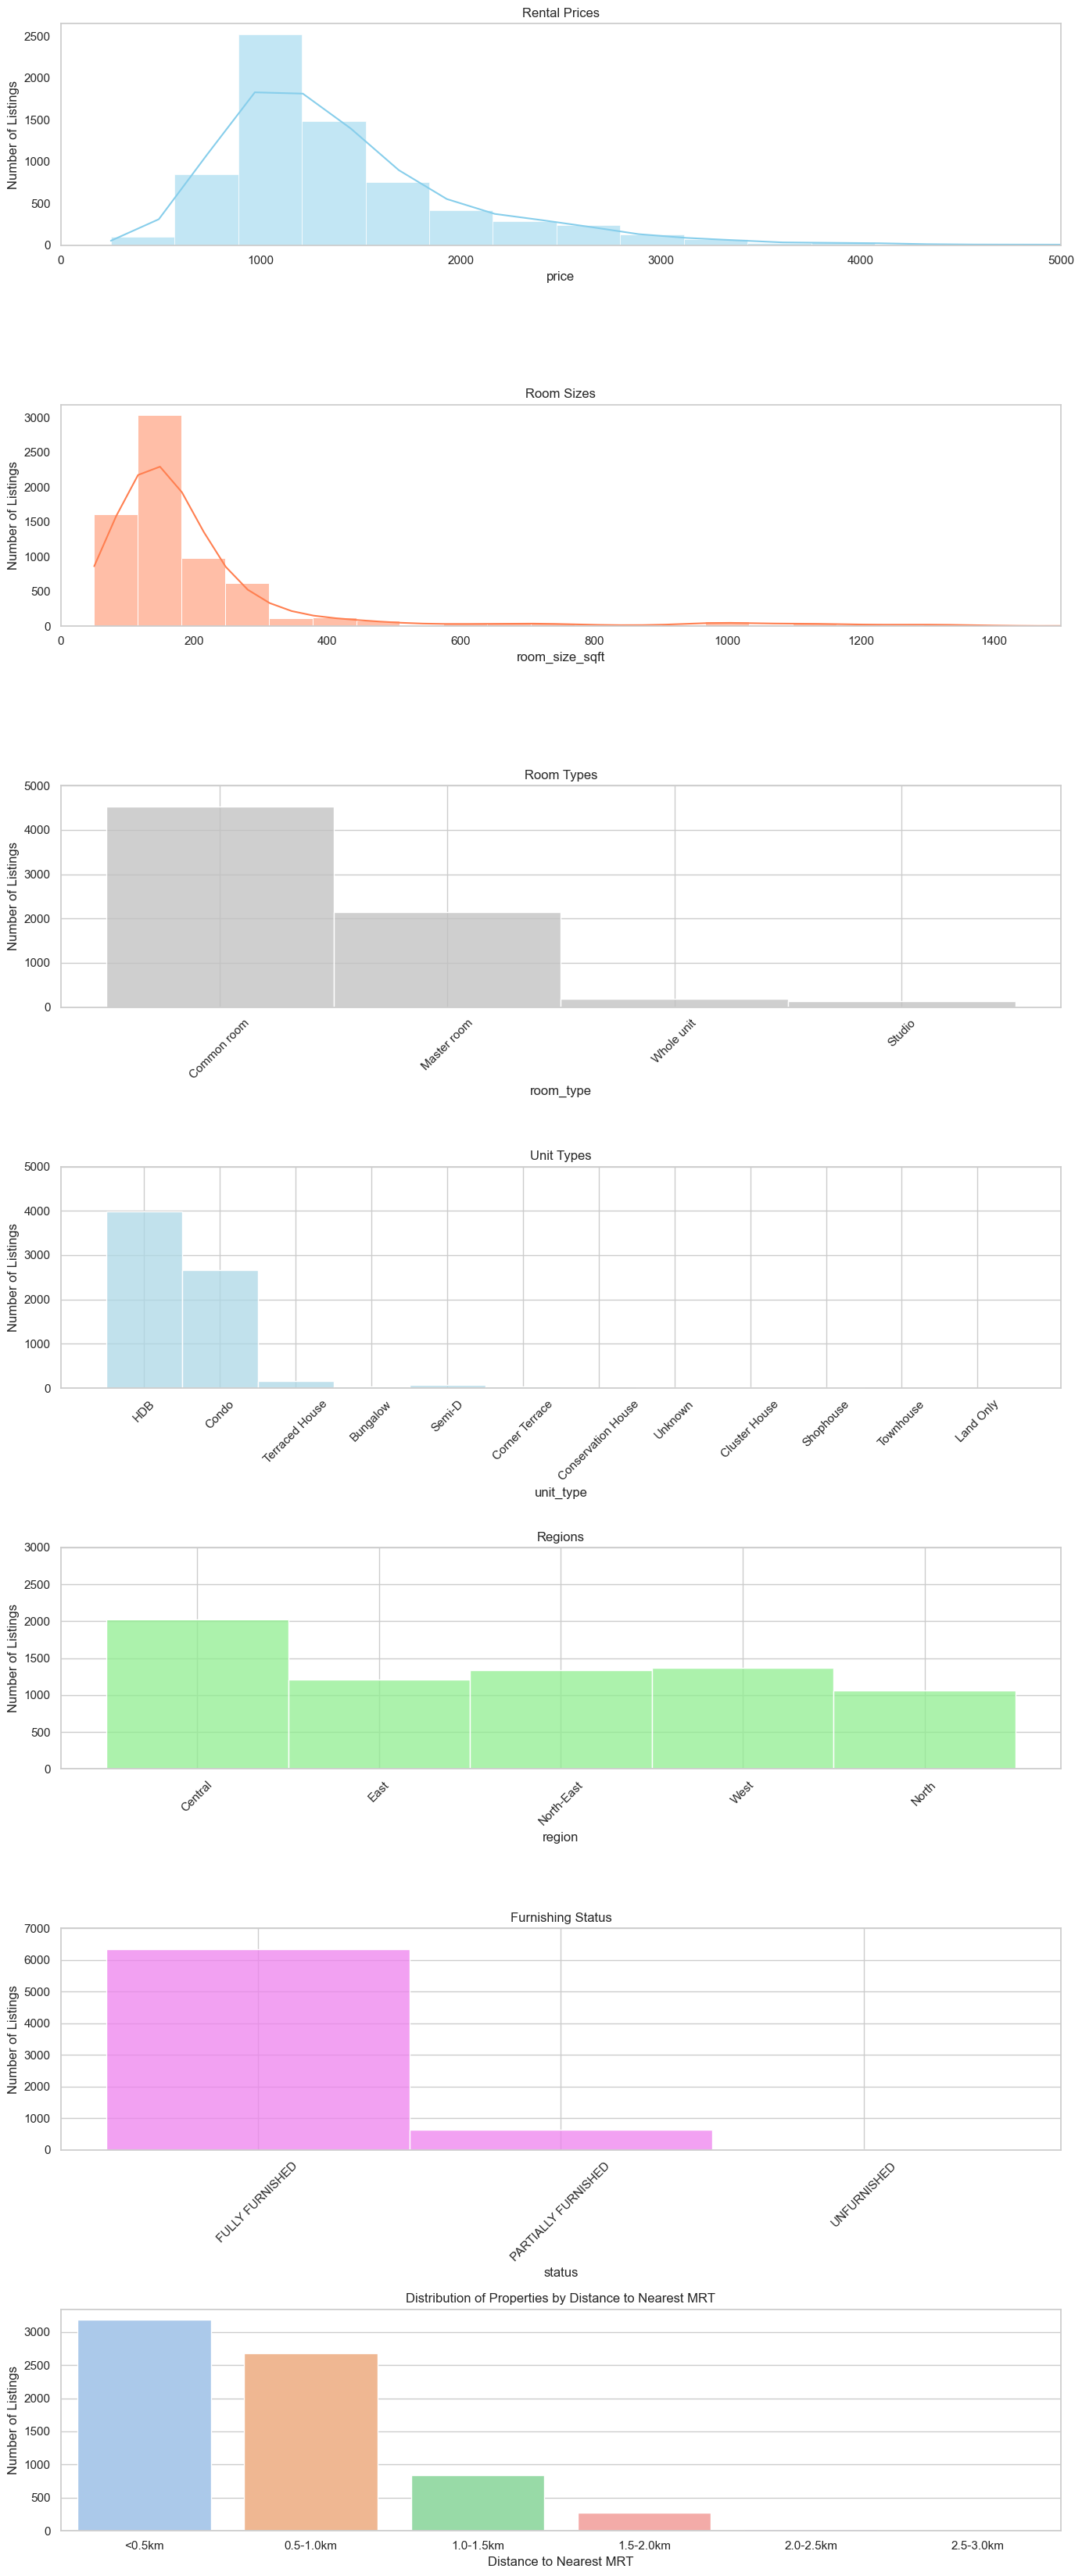

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
# Set Seaborn style and remove grid
sns.set_style("whitegrid")
sns.set_theme(style="whitegrid")

# Create subplots for histograms in a single row
fig, axes = plt.subplots(7, 1, figsize=(14, 36))

# Price distribution
sns.histplot(rental_data['price'], bins=150, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Rental Prices')
axes[0].set_ylabel('Number of Listings')
axes[0].set_xlim(0, 5000)
axes[0].grid(False)

# Room size distribution
sns.histplot(rental_data['room_size_sqft'], bins=100, kde=True, ax=axes[1], color='coral')
axes[1].set_title('Room Sizes')
axes[1].set_ylabel('Number of Listings')
axes[1].set_xlim(0, 1500)
axes[1].grid(False)

# Room type distribution
sns.histplot(rental_data['room_type'], ax=axes[2], color='silver')
axes[2].set_title('Room Types')
axes[2].set_ylabel('Number of Listings')
axes[2].set_ylim(0, 5000)  # Adjust the y-axis limit
axes[2].tick_params(axis='x', rotation=45)

# Unit type distribution
sns.histplot(rental_data['unit_type'], ax=axes[3], color='lightblue')
axes[3].set_title('Unit Types')
axes[3].set_ylabel('Number of Listings')
axes[3].set_ylim(0, 5000)  # Adjust the y-axis limit
axes[3].tick_params(axis='x', rotation=45)

# Region distribution
sns.histplot(rental_data['region'], ax=axes[4], color='lightgreen')
axes[4].set_title('Regions')
axes[4].set_ylabel('Number of Listings')
axes[4].set_ylim(0, 3000)  # Adjust the y-axis limit
axes[4].tick_params(axis='x', rotation=45)

# Furnishing status distribution
sns.histplot(rental_data['status'], ax=axes[5], color='violet')
axes[5].set_title('Furnishing Status')
axes[5].set_ylabel('Number of Listings')
axes[5].set_ylim(0, 7000)  # Adjust the y-axis limit
axes[5].tick_params(axis='x', rotation=45)

# Distance to MRT distribution
bin_edges = [0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0]
bin_labels = ['<0.5km', '0.5-1.0km', '1.0-1.5km', '1.5-2.0km', '2.0-2.5km', '2.5-3.0km']
rental_data['MRT_distance_bin'] = pd.cut(rental_data['Distance_to_Nearest_MRT_km'], bins=bin_edges, labels=bin_labels)
sns.countplot(x='MRT_distance_bin', data=rental_data, palette='pastel', order=bin_labels,ax=axes[6])
axes[6].set_title('Distribution of Properties by Distance to Nearest MRT')
axes[6].set_xlabel('Distance to Nearest MRT')
axes[6].set_ylabel('Number of Listings')

# Adjust spacing between subplots
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


**From the histogram, we observe that:**

- The majority of rental prices fall in the range of SGD 800 to SGD 1500, with a peak around SGD 1000.
- There are fewer properties available at extremely high or low rental prices, making the distribution somewhat right-skewed.
- Most room sizes range between 100 to 150 sqft.
- There's a noticeable peak around 150 sqft, suggesting that many properties available for rent are of this size.
- Very large or very small room sizes are less common in the dataset.
- Most of the listings are common room
- The number of master room is half of the number of common room
- Whole unit and studio are extremely rare
- Most of the listing in Singapore are HDB and Condo
- Only a small percentage of listings are landed
- Most of the listings in Singapore are fully furnished. Only some of the condo and landed units are partially or non furnished
- There are approximately 2,000 listings in the central region, which has the highest number. The number of listings in the remaining regions is similar, at around 1,200
- Most of the listing are located within 1 km to the MRT station


### 3.2 Price Distribution Analysis


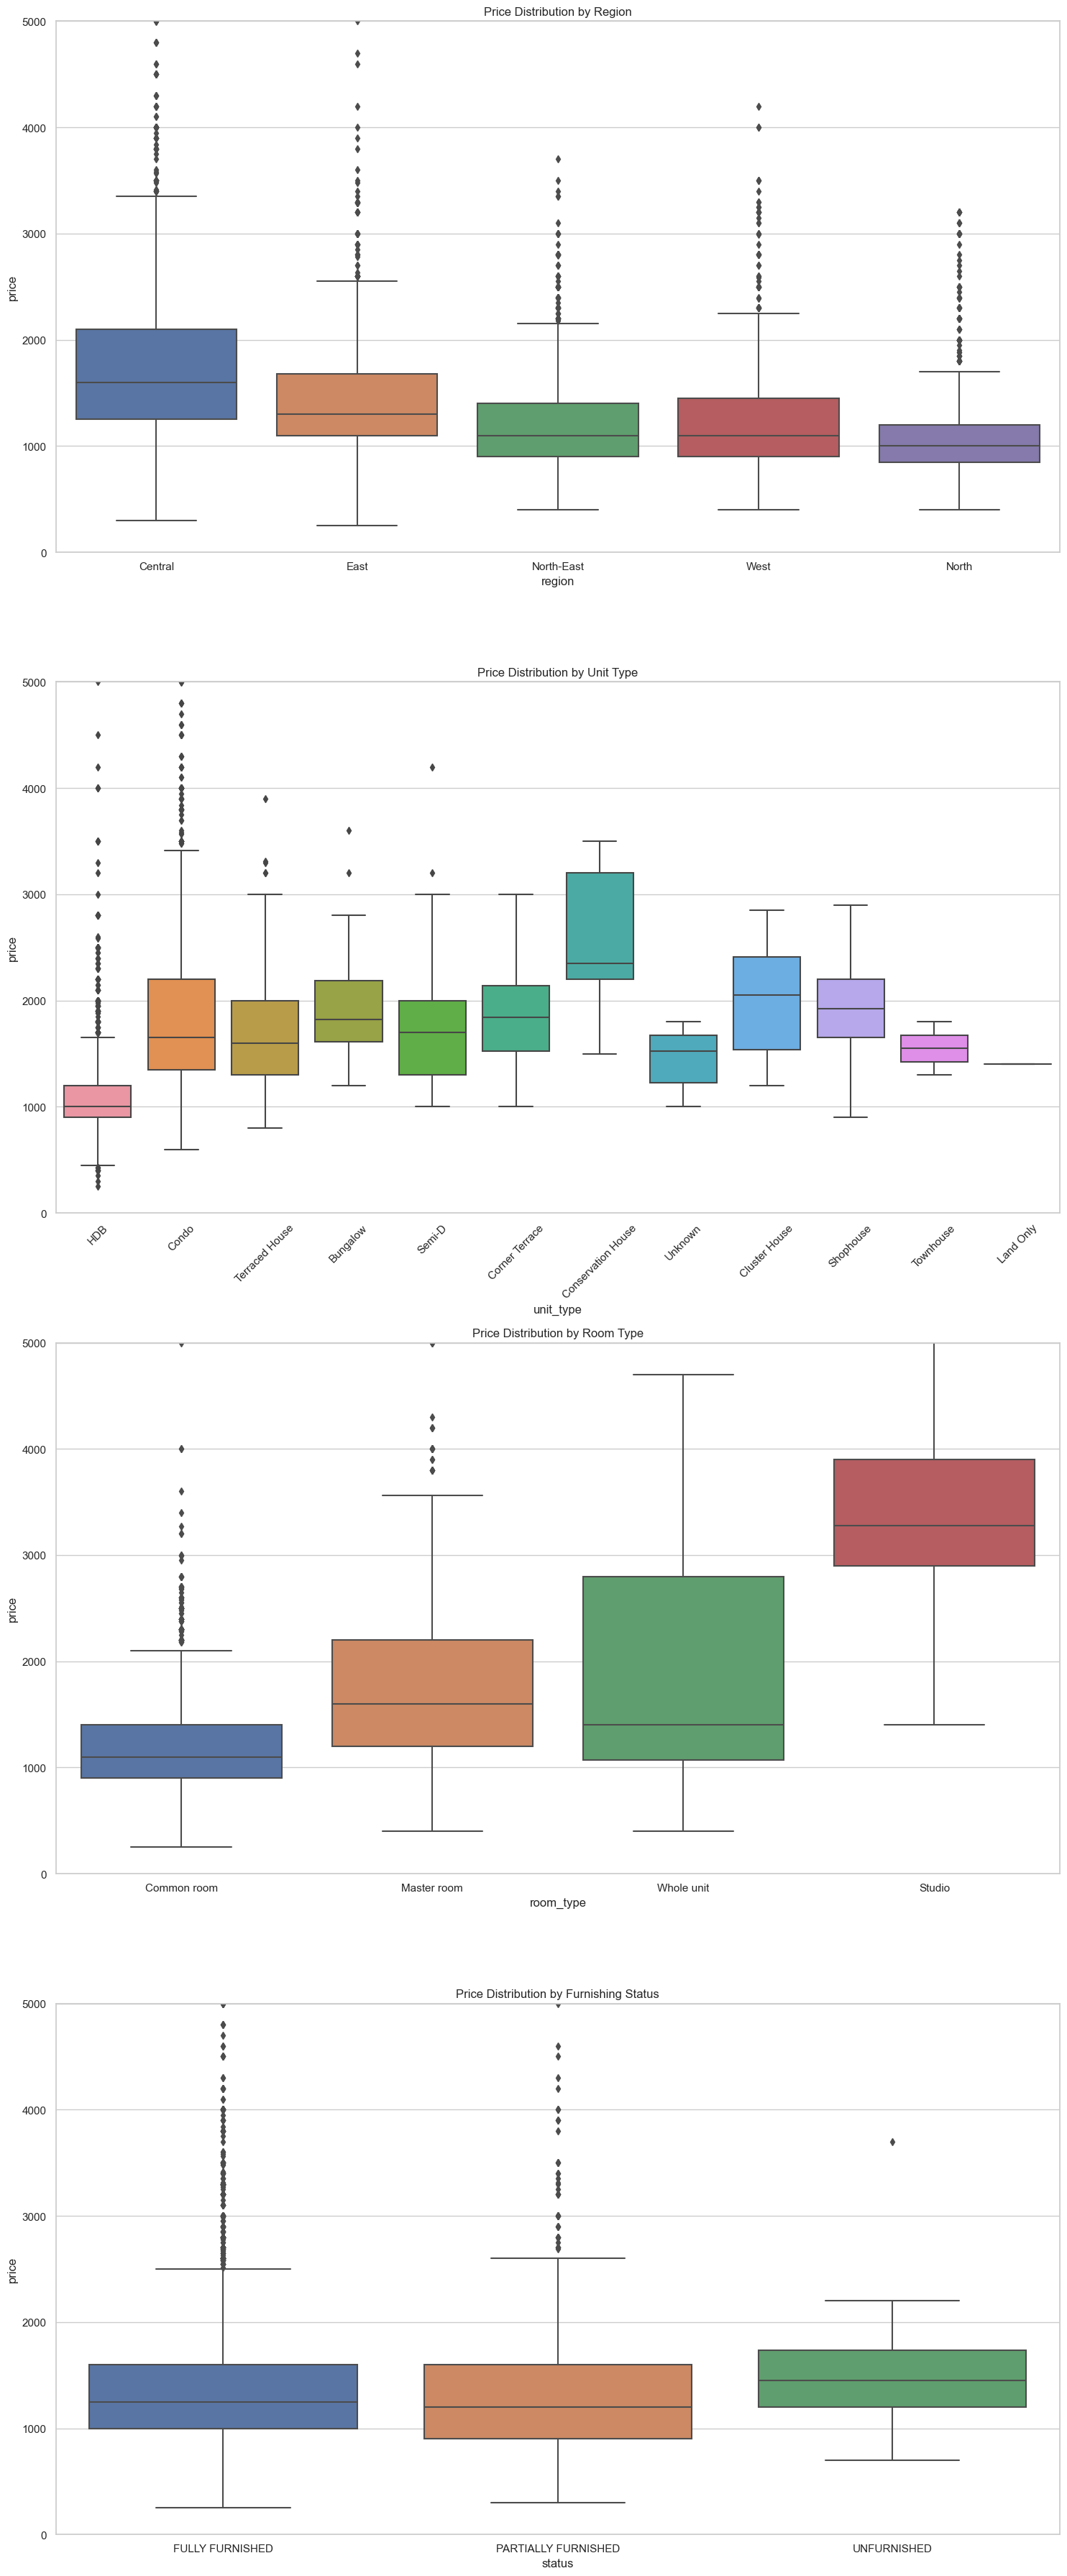

In [68]:
# Set up the plotting style
sns.set_style("whitegrid")

# Create a figure with subplots
fig, ax = plt.subplots(4, 1, figsize=(15, 36))

# Price distribution across different regions
sns.boxplot(data=rental_data, x='region', y='price', ax=ax[0])
ax[0].set_title('Price Distribution by Region')
ax[0].set_ylim(0, 5000)  # Limit y-axis to focus on majority of data

# Price distribution across different unit types
sns.boxplot(data=rental_data, x='unit_type', y='price', ax=ax[1])
ax[1].set_title('Price Distribution by Unit Type')
ax[1].set_ylim(0, 5000)  # Limit y-axis to focus on majority of data
ax[1].tick_params(axis='x', rotation=45)

# Price distribution across different room types
sns.boxplot(data=rental_data, x='room_type', y='price', ax=ax[2])
ax[2].set_title('Price Distribution by Room Type')
ax[2].set_ylim(0, 5000)  # Limit y-axis to focus on majority of data

# Price distribution across different room types
sns.boxplot(data=rental_data, x='status', y='price', ax=ax[3])
ax[3].set_title('Price Distribution by Furnishing Status')
ax[3].set_ylim(0, 5000)  # Limit y-axis to focus on majority of data

plt.tight_layout()
plt.show()

**Price Distribution by Region:**

- The Central region generally has higher median rental prices compared to other regions.
- The West, North-East, and East regions have somewhat similar median prices, while the North region has the lowest median prices among all regions.
- There are several outliers in each region, especially in the Central region, which could be luxury properties or properties with unique features.
- Additionally, rental prices in the central region have the highest dispersion, whereas the northern region has the lowest dispersion.

**Price Distribution by Unit Type:**

- Bungalows, Conservation Houses, and Semi-Detached (Semi-D) units tend to have higher median rental prices compared to other unit types. This is expected as these are larger and often more luxurious property types.
- HDBs and Condos have a wide range of prices, but HDBs tend to be more affordable with a lower median price.
- Other unit types like Terraced Houses, Corner Terraces, and Cluster Houses also have a broad price range but generally fall between HDBs and the more luxurious unit types in terms of median prices.

**Price Distribution by Room Type:**

- Studio have the highest median rental price, as they provide complete privacy and often more space.
- Master rooms have a higher median price than common rooms, which is expected given the additional amenities and space they usually offer.

**Price Distribution by Furnishing Status:**
- Furnishing status has minimal impact on rental price as most of the listings are fully furnished.
- Unfurnished listing has relatively higher rental price bacause most of them are either condo or landed units.


**Price Distribution by Proximity of MRT Station**


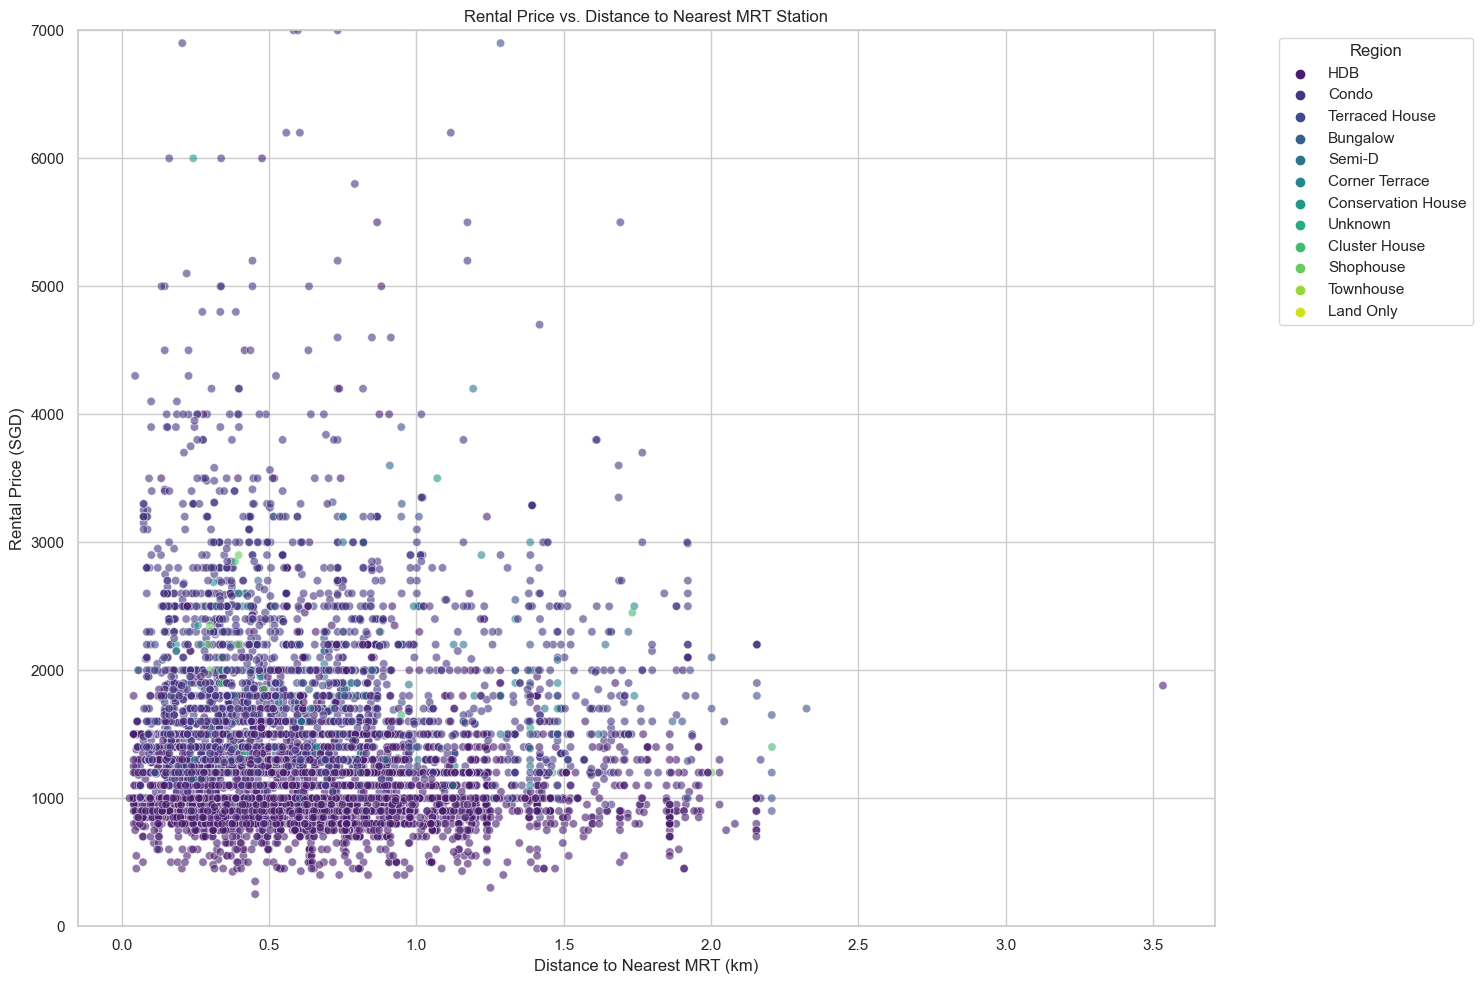

In [75]:
# Create a scatter plot to analyze the relationship between distance to MRT stations and rental prices

plt.figure(figsize=(15, 10))
sns.scatterplot(data=rental_data, x='Distance_to_Nearest_MRT_km', y='price', hue='unit_type', alpha=0.6, palette='viridis')
plt.title('Rental Price vs. Distance to Nearest MRT Station')
plt.ylim(0, 7000)  # Limit y-axis to focus on majority of data
plt.xlabel('Distance to Nearest MRT (km)')
plt.ylabel('Rental Price (SGD)')
plt.legend(title='Region', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The scatter plot illustrates the relationship between rental prices and their distance to the nearest MRT station, differentiated by unit type:

Proximity to MRT:

- Properties very close to MRT stations (within 0.5 km) tend to have a wide range of prices. While some are priced relatively low, there are others with much -higher prices. This suggests that while proximity to an MRT station can be a factor in determining rental prices, it's not the sole determinant.

Higher Prices at Closer Distances:

- There's a clear trend of properties close to MRT stations having higher prices in general. This is especially prominent in the Central region.



### 3.3 Correlation Matrix Heatmap

The heatmap of the correlation matrix provides insights into the relationships between the numerical variables in the dataset.


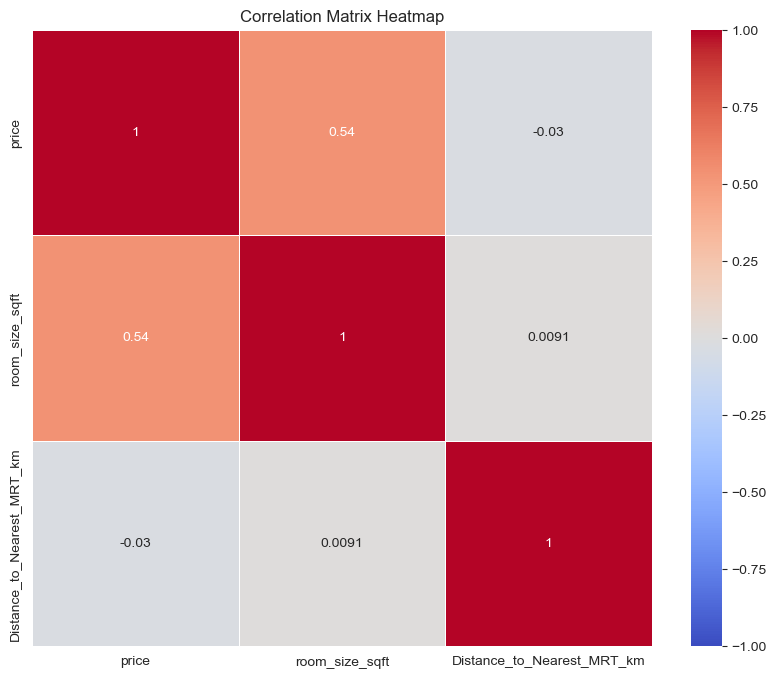

In [16]:

correlation_matrix = rental_data[['price', 'room_size_sqft', 'Distance_to_Nearest_MRT_km']].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.show()



The heatmap provides a visual representation of the correlation between numerical variables:

- Rental price has a moderate positive correlation with room size, indicating that larger rooms tend to be more expensive.
- Rental price has a slight negative correlation with the distance to the nearest MRT station, suggesting that properties closer to MRT stations might be priced slightly higher. However, the correlation is not very strong, indicating other factors also play a significant role in determining rental prices.


## Key Takeaways:

Regional and Planning Area Affordability: Rental prices in Singapore vary significantly by region and planning area. The northern and western regions tend to offer more affordable options, while the central region is known for its higher prices. Understanding these regional differences can help renters make informed decisions based on their budget.

Location Impact: Location is a crucial factor in rental pricing. Prices can range widely, emphasizing the importance of considering location preferences when searching for rental properties.

Unit Type Influence: Unit type, particularly the distinction between HDB and non-HDB properties, plays a significant role in rental prices. HDB units are generally more affordable, making them a suitable choice for budget-conscious renters.

Room Type Hierarchy: Room types follow a clear hierarchy in terms of pricing, with studios commanding the highest prices, followed by master rooms and common rooms. Understanding these price differentials helps renters choose accommodation that aligns with their preferences and budget.

MRT Proximity and Price Variation: Proximity to the nearest MRT station has a limited impact on rental prices, but notable variations exist as you approach and move away from stations. Renters can explore options both near and farther from MRT stations based on their priorities.

Room Size Impact: Larger rooms generally come at a higher price, reflecting the additional space and amenities they offer.

Furnishing Status: Furnishing status has minimal impact on rental prices, with most listings being fully furnished. This information can guide renters who have specific furnishing preferences.

Price and Room Size Ranges: Most rental prices fall within the 800 to 1200 range, with room sizes typically varying between 100 to 150 sqft. These ranges provide a reference point for renters to assess whether a listing fits their budget and space requirements.